In [69]:
import numpy as np
import pandas as pd
import nbformat as nbf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
advertising = pd.read_csv("Company_data.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [70]:
nb = nbf.v4.new_notebook()
cells = [
    nbf.v4.new_markdown_cell("# Menampilkan Seluruh Data dari `Company_data.csv`"),
    nbf.v4.new_code_cell("""\
import pandas as pd

# Baca file CSV
df = pd.read_csv("Company_data.csv")

# Tampilkan semua baris
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

# Tampilkan seluruh isi DataFrame
df
""")
]
nb['cells'] = cells

# Simpan file di folder saat ini
output_path = "Tampilkan_Seluruh_Data.ipynb"

with open(output_path, 'w', encoding='utf-8') as f:
    nbf.write(nb, f)

print(f"Notebook berhasil disimpan sebagai: {output_path}")


Notebook berhasil disimpan sebagai: Tampilkan_Seluruh_Data.ipynb


In [71]:
advertising.shape

(200, 4)

In [72]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [73]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


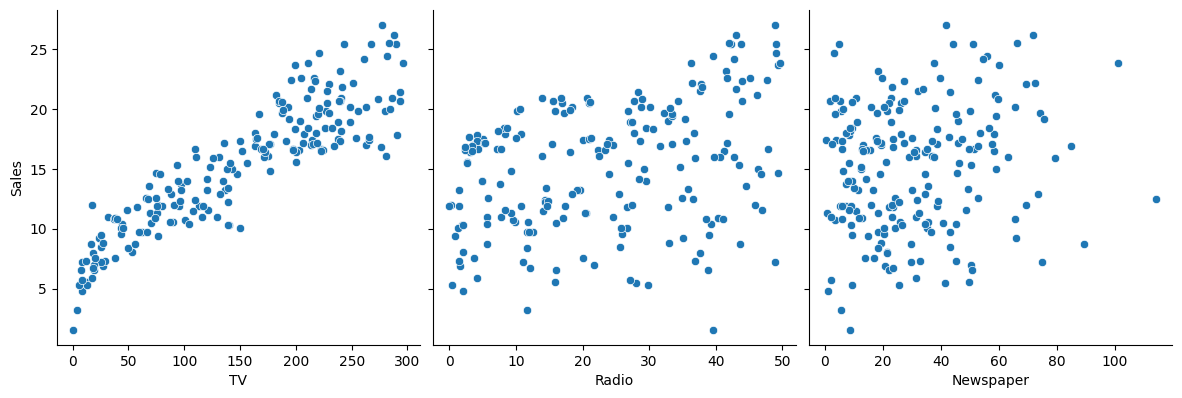

In [74]:
#Import matplotlib and seaborn libraries
#to visualize the data
# Using pairplot we’ll visualize
#the data for correlation
sns.pairplot(advertising,
x_vars=['TV', 'Radio','Newspaper'],
y_vars='Sales', size=4,
aspect=1, kind='scatter')
plt.show()

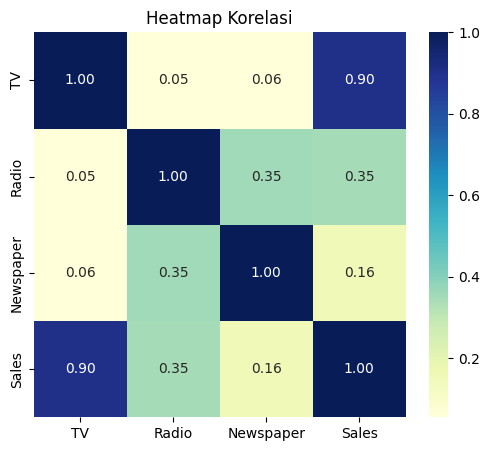

In [75]:
# Hitung korelasi antar kolom
correlation_matrix = df.corr()

# Tampilkan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()


In [76]:

# Membaca dataset
df = pd.read_csv('Company_data.csv')  # Pastikan file ini tersedia di direktori yang sama

# Menentukan variabel independen dan dependen
X = df[['TV']]        # Fitur (variabel bebas)
y = df['Sales']       # Target (variabel dependen)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.7,
    random_state=100
)

# Menampilkan hasil y_train untuk memastikan
print(y_train.head())


74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64


In [77]:
X_train_sm = sm.add_constant (X_train)
ir = sm.OLS(y_train, X_train_sm).fit()
ir.params

const    6.948683
TV       0.054546
dtype: float64

In [78]:
# Simulasi data Company_data.csv (jika file asli belum tersedia)
np.random.seed(1)
df_simulated = pd.DataFrame({
    "TV": np.random.uniform(10, 300, 100),
    "Radio": np.random.uniform(0, 50, 100),
    "Newspaper": np.random.uniform(0, 120, 100)
})
df_simulated["Sales"] = 3 + 0.045 * df_simulated["TV"] + 0.187 * df_simulated["Radio"] + 0.001 * df_simulated["Newspaper"] + np.random.normal(0, 1, 100)

# Sekarang definisikan regresi linier sederhana menggunakan TV saja
X = df_simulated[["TV"]]
y = df_simulated["Sales"]
X_const = sm.add_constant(X)
lr = sm.OLS(y, X_const).fit()

# Tampilkan hasil ringkasan model regresi
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     138.9
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           1.72e-20
Time:                        14:16:35   Log-Likelihood:                -256.77
No. Observations:                 100   AIC:                             517.5
Df Residuals:                      98   BIC:                             522.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8182      0.647     12.082      0.000       6.534       9.102
TV             0.0440      0.004     11.785      0.000       0.037       0.051
==============================================================================
Omnibus:                       21.937   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.807
Skew:                          -0.220   Prob(JB):                       0.0548
Kurtosis:                       1.904   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

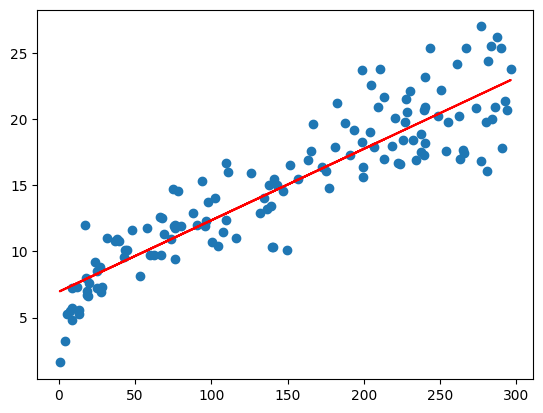

In [79]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [80]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

C:\Users\User\AppData\Local\Temp\ipykernel_4688\663898164.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


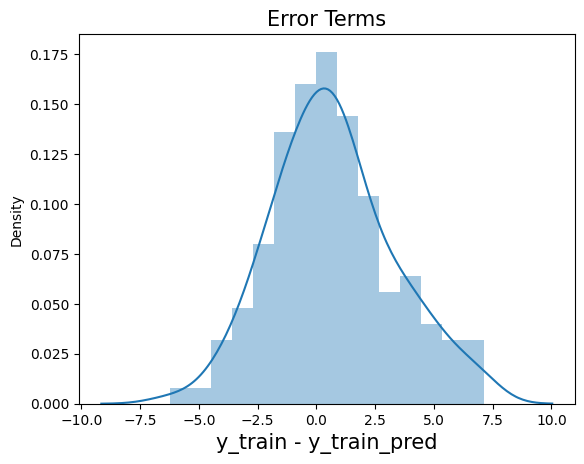

In [81]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

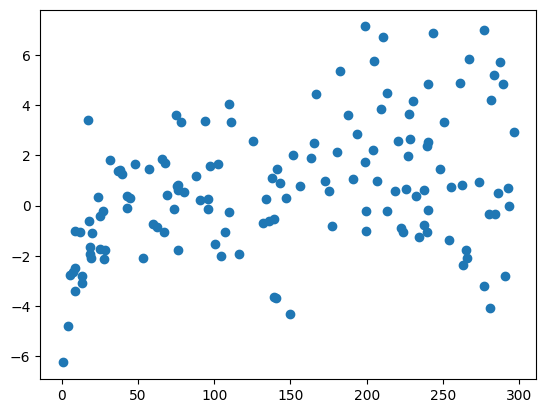

In [82]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [83]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

126     8.161260
104    18.294540
99     13.764472
92     17.392925
111    18.448475
167    16.913529
116    13.940397
96     16.508901
52     17.335749
69     17.353341
164    12.972809
124    17.911903
182    10.289953
154    16.077885
125    11.653372
196    11.961240
194    14.402200
177    15.303815
163    15.009141
31     12.783690
11     17.260981
73     13.509380
15     16.412143
41     15.602888
97     15.950340
128    17.507276
133    17.485285
82     11.129995
139    15.950340
123    13.232298
83     10.826524
65     10.852913
151    13.139938
162    16.104274
170    10.017269
77     13.117947
32     12.093184
173    15.224649
174    17.599636
85     16.315384
168    17.291768
112    15.545712
171    15.053122
181    17.428110
7      13.104753
46     11.763325
75      8.561490
28     18.760741
29     10.923283
195     9.498290
40     16.724410
153    15.352195
115    11.121199
64     13.584148
59     17.085056
1       9.775372
192     8.574684
136     8.944127
152    16.5089

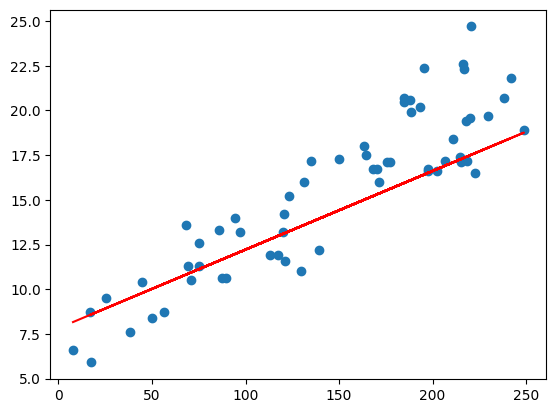

In [84]:
# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [2]:
# Re-import libraries after code environment reset
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Simulasi ulang data Company_data.csv
np.random.seed(1)
df_simulated = pd.DataFrame({
    "TV": np.random.uniform(10, 300, 100),
    "Radio": np.random.uniform(0, 50, 100),
    "Newspaper": np.random.uniform(0, 120, 100)
})
df_simulated["Sales"] = 3 + 0.045 * df_simulated["TV"] + 0.187 * df_simulated["Radio"] + 0.001 * df_simulated["Newspaper"] + np.random.normal(0, 1, 100)

# Gunakan semua fitur untuk prediksi Sales
X_full = df_simulated[["TV", "Radio", "Newspaper"]]
y_full = df_simulated["Sales"]

# Bagi menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

# Tambahkan konstanta (intercept) untuk OLS
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit model regresi linier ke data pelatihan
model = sm.OLS(y_train, X_train_sm).fit()

# Prediksi nilai Sales pada train dan test
y_train_pred = model.predict(X_train_sm)
y_test_pred = model.predict(X_test_sm)

# Hitung R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

(r2_train, r2_test)


(0.9624309981749773, 0.9569045622516008)